In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

Ok, first things first, lets get a dataset loaded in

In [4]:
df = pd.read_csv("../Datasets/EPU_VIX_NASDAQ_Weekly_1990-2023.csv")

In [5]:
df.head(5)

,DATE,US_EPU_Weekly,NASDAQ,VIX,EPU_Chg%,NAS_Chg%,VIX_Chg%
0,08/01/1990,126.54,439.700012,24.639999,-0.567089,-0.040375,0.225261
1,15/01/1990,64.57,440.899994,22.500000,-0.489727,0.002729,-0.086851
2,22/01/1990,108.89,421.299988,26.280001,0.686387,-0.044455,0.168000
3,29/01/1990,196.57,422.200012,24.320000,0.805216,0.002136,-0.074581
4,05/02/1990,123.05,428.799988,23.690001,-0.374014,0.015632,-0.025905


In [6]:
df.describe()

,US_EPU_Weekly,NASDAQ,VIX,EPU_Chg%,NAS_Chg%,VIX_Chg%
count,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000
mean,116.129213,3724.022858,19.416129,0.259173,0.002400,0.008823
std,78.455368,3571.680392,7.917952,1.307386,0.030288,0.141182
min,5.800000,327.600006,9.140000,-0.966682,-0.253047,-0.426630
25%,65.137500,1458.755005,13.740000,-0.338672,-0.012561,-0.074074
50%,95.245000,2333.950073,17.505000,-0.007506,0.003546,-0.008333
75%,147.517500,4742.339966,22.787501,0.492125,0.019533,0.067812
max,642.660000,16057.440430,79.129997,27.604027,0.189781,1.348361


So we now have a dataset with 1754 observations for 3 variables:

the NASDAQ
US Economic Policy Uncertainty
The VIX volatility index

The question then is does US Policy uncertainty and the VIX volatility index, have any correlation (positive or negative) to price changes on the NASDAQ?

To normalize, simple weekly chg % has been calculated for each variable.

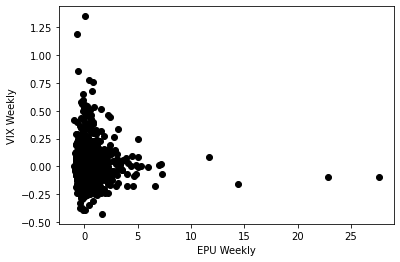

In [10]:
plt.scatter(df["EPU_Chg%"], df["VIX_Chg%"], color="black")
plt.xlabel("EPU Weekly")
plt.ylabel("VIX Weekly")
plt.show()

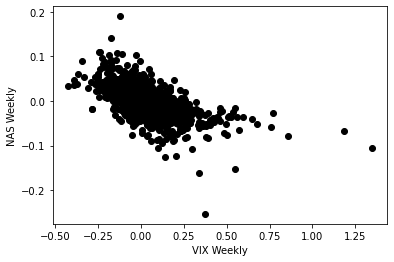

In [11]:
plt.scatter(df["VIX_Chg%"], df["NAS_Chg%"], color="black")
plt.xlabel("VIX Weekly")
plt.ylabel("NAS Weekly")
plt.show()

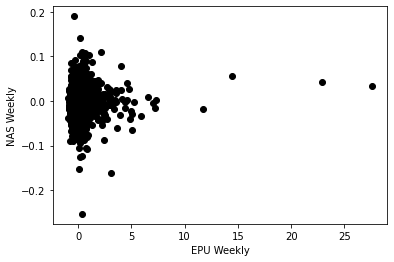

In [12]:
plt.scatter(df["EPU_Chg%"], df["NAS_Chg%"], color="black")
plt.xlabel("EPU Weekly")
plt.ylabel("NAS Weekly")
plt.show()

There appears to be some negative correlation between the VIX and NASDAQ as expected however extreme outliers in the EPU Index make it challenging to suggest any correlation.

To conduct a linear regression we are utlizing a Train/Test split. This means the dataset will be divided into two parts with one being used for training the model and the other to assess its accuracy.

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

The variable msk creates a 'mask' or an array of boolean values that can be applied to the dataframe.

Here random values between 0 and 1 are created and True is appplied whenever the value is less than 0.8 or 80% of the dataframe.

These masks can then be applied to the dataframe creating two separate datasets; one for training and the other for testing

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["EPU_Chg%", "VIX_Chg%"]])
y = np.asanyarray(train[['NAS_Chg%']])
regr.fit(x,y)
print(f"The coefficients are: {regr.coef_}")

The coefficients are: [[ 0.0001989  -0.12963004]]


In the previous code, an instance of the Linear Regression object from the sklearn package is created (regr).

the x values (independent variables) and y values (dependent variables) are passed as arrays to the regr object and it calculates the coefficients of both independents with the dependent utilizing the 'ordinary least squares' method.

The OLS method finds the plane that minimizes the sum of the squares of the differences between the target dependent variable and the predicted linear function. Explained another way, it tries to minimize the sum of squared errors or mean squared errors between y (the actual value) and  y_hat (the predicted variable) for all samples of the dataset.

This method is suitable for datasets below 10000 observations but becomes computationally slow after this point. Other methods such as:

* Gradient Descent
* Stochastic Descent
* Newtons Method

Can be utlized for larger data sets



In [15]:
y_hat = regr.predict(test[["EPU_Chg%", "VIX_Chg%"]])
x = np.asanyarray(test[["EPU_Chg%", "VIX_Chg%"]])
y = np.asanyarray(test[['NAS_Chg%']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.00
Variance score: 0.38


C:\Users\alexj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Finally, we use the trained model (regr) to predict the values of the dependent variable using the test data.

We then calculate the residual sum of squares which is the mean average of the square of the error between the predicted value (y_hat) and the actual value (y)

finally, the R^2 value is calculated with the .score() method.

R^2 is the ratio of explained to unexplained variance in the dependent variable.

This is calculated as 1 minus the sum of the squared residuals (the sum of the squared differences between the actual dependent variables (y) and the predicted values (y_hat), divided by the total sum of squares (the sum of the squared differences between the actual dependent variable values and the mean of the dependent variable).

The higher the value the better the fit up to a maximum value of 1 